# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Загружаем библиотеки
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', 50)

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t') 

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
print('\nЧисло дубликатов:', data.duplicated().sum())


Число дубликатов: 0


In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


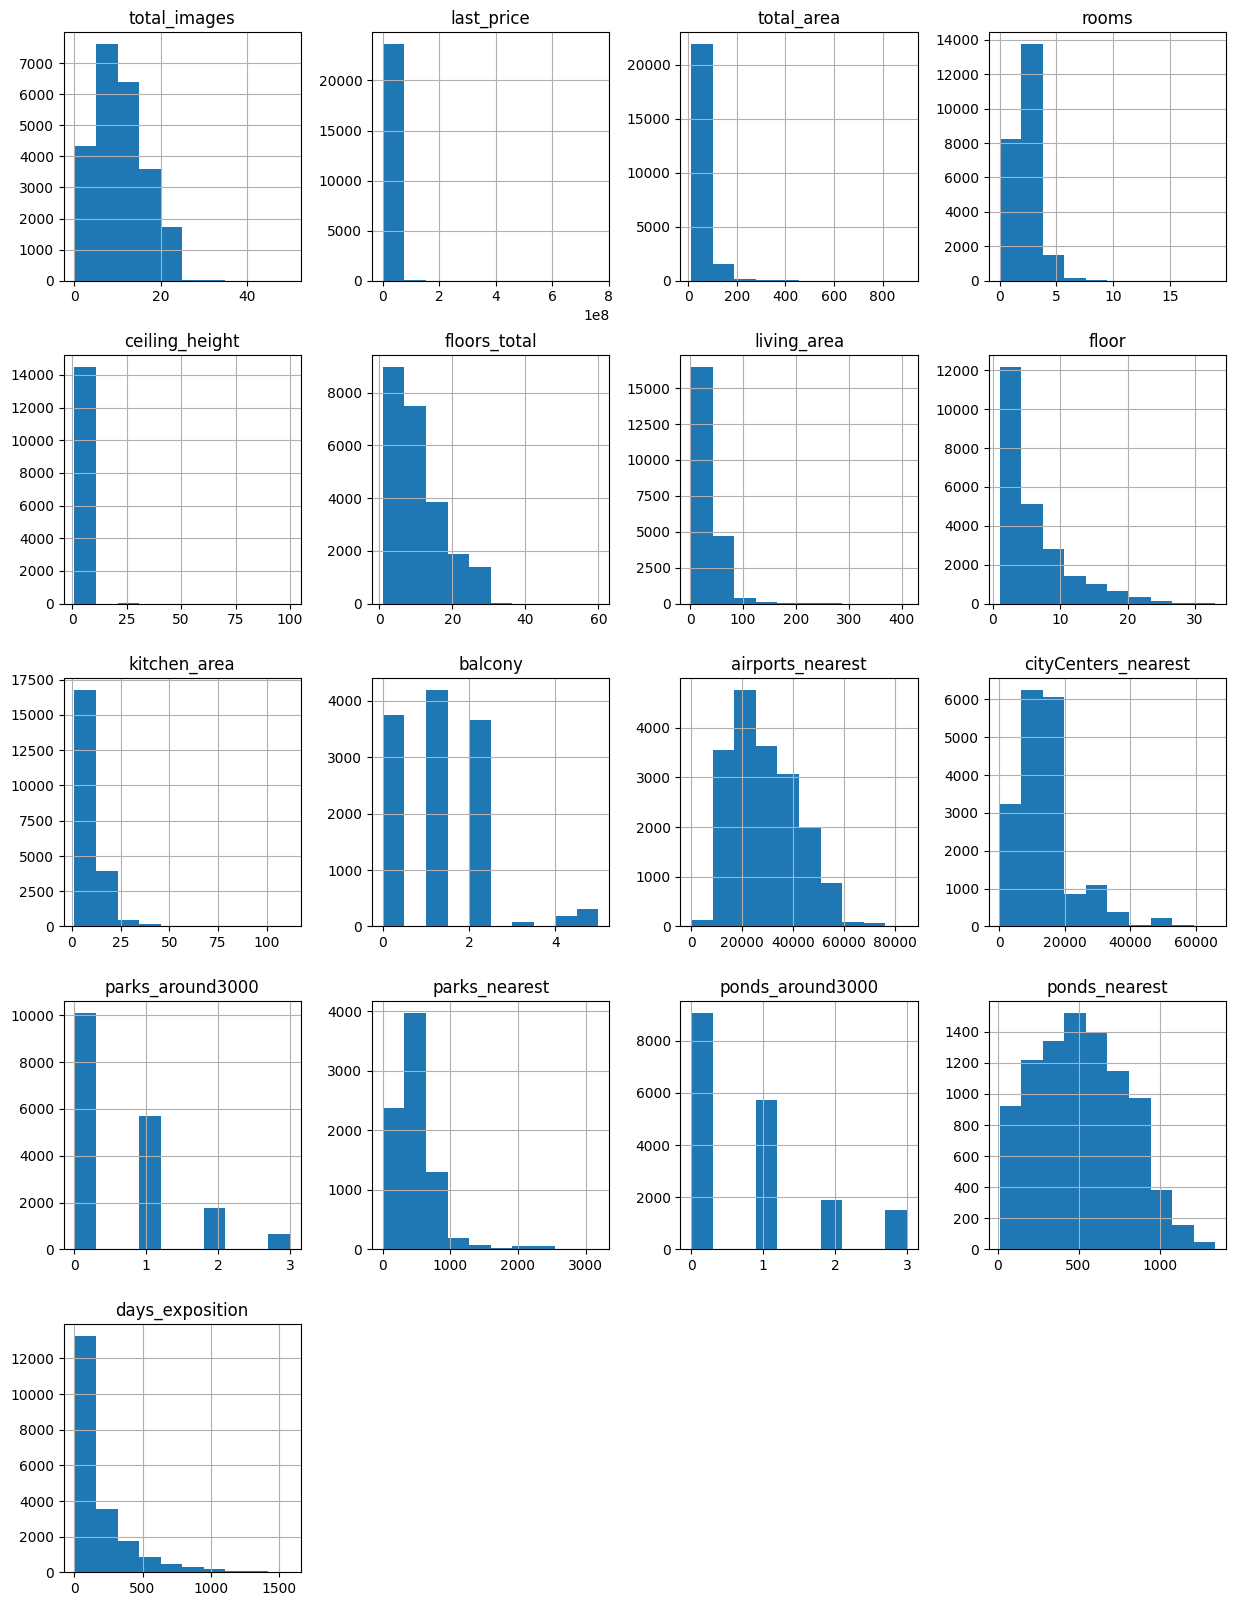

In [7]:
data.hist(figsize=(15, 20))
None

**Вывод.** 
Без разделителя \t датасет отображался некорректно. В таблице 22 столбца и 23699 строк.

Можно выделить замечания по типам данных и пропускам: 

*first_day_exposition* должен быть тип datetime, 

ceiling_height - есть пропуски, 

floors_total - должен быть int, есть пропуски, 

*is_apartment* - должен быть bool, есть пропуски, 

living_area - есть пропуски, 

kitchen_area - есть пропуски, 

*balcony* - есть пропуски, 

*locality_name* - есть пропуски, 

airports_nearest - есть пропуски, 

cityCenters_nearest - есть пропуски, 

parks_around3000 - тип должен быть int, есть пропуски, 

parks_nearest - есть пропуски, 

ponds_around3000 - тип должен быть int, есть пропуски, 

ponds_nearest - есть пропуски, 

days_exposition - тип должен быть int, есть пропуски.   

### Предобработка данных

Приведём в целочисленный тип стоимость квартиры.

In [8]:
data['last_price'] = data['last_price'].astype('int64')

Приведём к типу даты дату публикации.

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Приведём количество значений в аппартаментах к булевому типу и заменим пропущенные значения на False.

In [10]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Приведём в целочисленный тип количество балконов. Заменим пропуски на 0. Скорее всего, их просто нет.

In [11]:
data['balcony'] = data['balcony'].fillna(value=0).astype('int64')

Приведём в целочисленный тип количество парков. Заменим пропуски на 0. Скорее всего, их просто нет.

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int64')

Приведём в целочисленный тип количество прудов. Заменим пропуски на 0. Скорее всего, их просто нет.

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int64')

Проверим оставшееся количество пропущенных значений.

In [14]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поскольку пропуски в названиях населённых пунктов и этажности домов очень малы по количеству и мы не можем их адекватно заполнить, удалим их.

In [15]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

Приведём этажность к целочисленному типу.


In [16]:
data['floors_total'] = data['floors_total'].astype('int64')

Заполним пропуски значения высоты потолков на медианное значение по всему датасету.

In [17]:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

Заменим пропуски значений жилой площади и площади кухни, исходя из того, что площади пропорциональны общей площади.

In [18]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Ещё раз проверим количество пропусков.

In [19]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Оставшиеся значения пока оставим без заполнения.

Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [20]:
# Выведем уникальные значения
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

**Вывод**

Присутствуют идентичные населённые пункты, с небольшими отличиями в характеристике названия вида посёлок/деревня/село. Их требуется устранить. 

In [21]:
data['locality_name'] = data['locality_name'].astype('str')
# Создадим функцию для устранения неявных дубликатов названий, функция оставит только само название без типа
def make_short_name(row):
    split_name = row.split()
    new_name = []
    for word in split_name:
        if word[0].isupper():
            new_name.append(word)
    new_name = ' '.join(word for word in new_name)
    return new_name
    
#  Применим функцию в датафрейму
data['locality_name_no_duplicates'] = data['locality_name'].apply(make_short_name)

# Проверим сокращение уникальных значений
print('Количество населённых пунктов до обработки:', len(data['locality_name'].unique()))
print('Количество населённых пунктов после обработки:', len(data['locality_name_no_duplicates'].unique()))
print(data['locality_name_no_duplicates'].unique())
# Перезапишем названия 
data['locality_name'] = data['locality_name_no_duplicates']

Количество населённых пунктов до обработки: 364
Количество населённых пунктов после обработки: 305
['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'

In [22]:
# Создаём список столбцов с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']

for name in list_features:
    q1 =  data[name].quantile(0.25)
    q3 = data[name].quantile(0.75)
    iqr = q3 - q1
    data_iqr = data[(data[name] > (q1-1.5*iqr)) & (data[name] < (q3+1.5*iqr))]
    print('Процент выбросов в', name, 'равен:', (1 - data_iqr[name].count() / data[name].count()) * 100) 




Процент выбросов в last_price равен: 8.682367918523237
Процент выбросов в total_area равен: 5.2577975811584965
Процент выбросов в kitchen_area равен: 5.580309781455551
Процент выбросов в living_area равен: 3.7470825376617833
Процент выбросов в days_exposition равен: 8.20339315484947
Процент выбросов в ceiling_height равен: 7.332908975175045
Процент выбросов в rooms равен: 0.8232548270740492


**Вывод:** процент выбросов в каждой группе меньше 10, можем от них избавиться.

In [23]:
data = data_iqr  
# Изучаем получившийся датасет
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23371.000000,2.337100e+04,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,23371.000000,17853.000000,17875.000000,23371.000000,7898.000000,23371.000000,8908.000000,20257.000000
mean,9.870352,6.253900e+06,58.847615,2.030208,2.734245,10.715331,33.619735,5.892474,10.384332,0.596295,28840.557161,14279.160783,0.462582,491.990251,0.584956,519.739223,180.107370
std,5.672178,8.165929e+06,30.172381,0.973563,1.011814,6.602055,18.906458,4.880720,5.761793,0.962098,12674.839200,8595.682895,0.741924,343.085337,0.880446,277.985460,219.188834
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,18503.000000,9424.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000e+06,51.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26880.000000,13149.000000,0.000000,456.000000,0.000000,503.500000,95.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.750000,16.000000,42.000000,8.000000,11.900000,1.000000,37364.000000,16316.000000,1.000000,614.000000,1.000000,733.000000,230.000000
max,50.000000,4.013000e+08,507.000000,5.000000,100.000000,60.000000,301.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** после удаления аномалий данные стали качественней.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец со стоимостью квадратного метра и приводим его в целочисленный тип.

In [24]:
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype('int64')

<ipython-input-24-d0939ccb074e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sm_price'] = data['last_price'] / data['total_area']
<ipython-input-24-d0939ccb074e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sm_price'] = data['sm_price'].astype('int64')


Добавим столбцы с днём недели, месяцем и годом публикации объявления.

In [25]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец категории этажей при помощи функции.

In [26]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Добавим столбцы с отношением жилой площади к общей и площади кухни к общей, выразим в процентах и переведём в целочисленный тип.

In [27]:
data['area_ratio'] = data['living_area'] / data['total_area'] * 100
data['area_ratio'] = data['area_ratio'].fillna(value=0).astype('int64')


data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'] * 100
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(value=0).astype('int64')

### Проведите исследовательский анализ данных

Исследуем общую площадь.

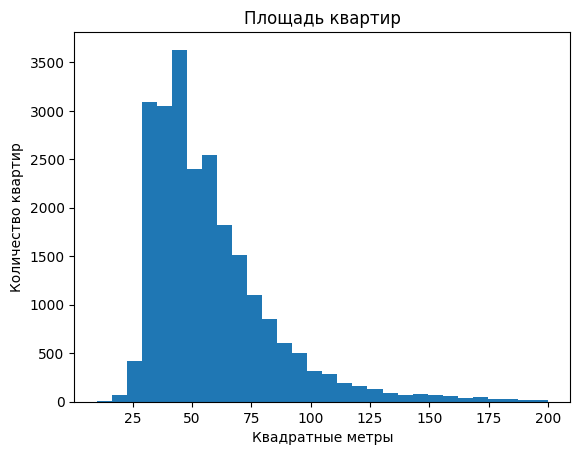

count    23371.000000
mean        58.847615
std         30.172381
min         12.000000
25%         40.000000
50%         51.900000
75%         69.000000
max        507.000000
Name: total_area, dtype: float64

Наибольшие по площади варианты:
8018     507.00
15016    500.00
9826     494.10
22494    491.00
6621     488.00
6221     470.30
3676     441.98
22131    422.20
14706    401.00
1388     399.00
Name: total_area, dtype: float64


In [28]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(data['total_area'].describe())
print()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))


Исследуем стоимости квартир.

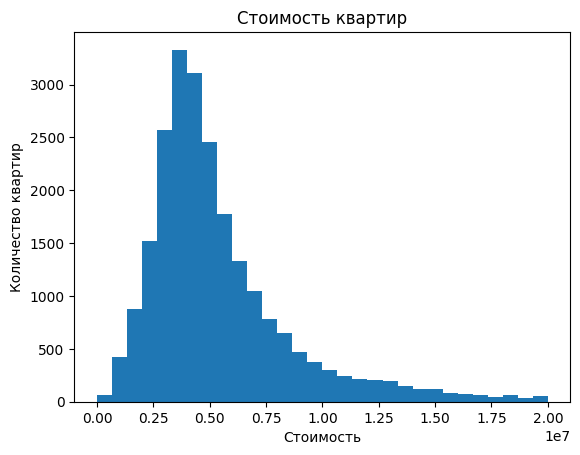

count    2.337100e+04
mean     6.253900e+06
std      8.165929e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.013000e+08
Name: last_price, dtype: float64

Наибольшие по цене варианты:
14706    401300000
1436     330000000
22831    289238400
8900     190870000
19155    160000000
2536     159984000
16495    159000000
1026     155000000
15016    150000000
22229    148000000
Name: last_price, dtype: int64


In [29]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print(data['last_price'].describe())
print()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

Исследуем число комнат.

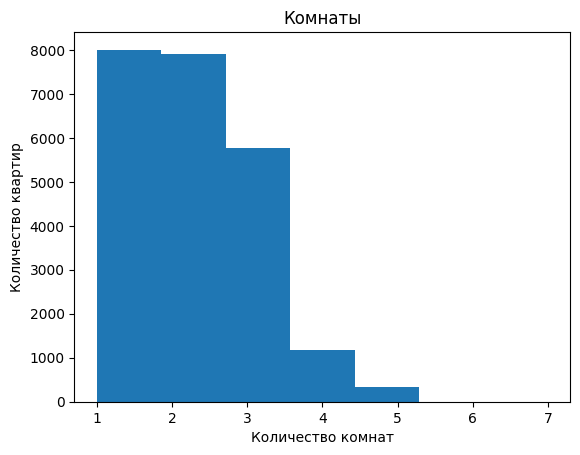

count    23371.000000
mean         2.030208
std          0.973563
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Наибольшие по числу комнат варианты:
11851    5
15856    5
22494    5
22502    5
15999    5
5648     5
4035     5
18633    5
18651    5
9419     5
Name: rooms, dtype: int64


In [30]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print(data['rooms'].describe())
print()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))



Исследуем высоту потолков.

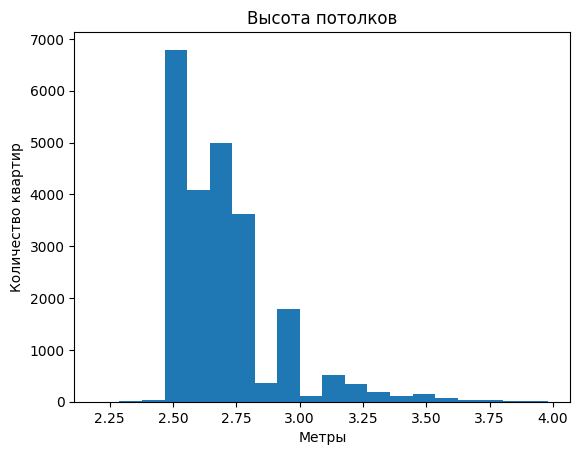

count    23371.000000
mean         2.734245
std          1.011814
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Наибольшие по высоте потолков варианты:
22869    100.0
3148      32.0
22336     32.0
21377     27.5
17857     27.0
10773     27.0
20478     27.0
21824     27.0
4876      27.0
5246      27.0
Name: ceiling_height, dtype: float64


In [31]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print(data['ceiling_height'].describe())
print()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Исследуем площадь кухни.

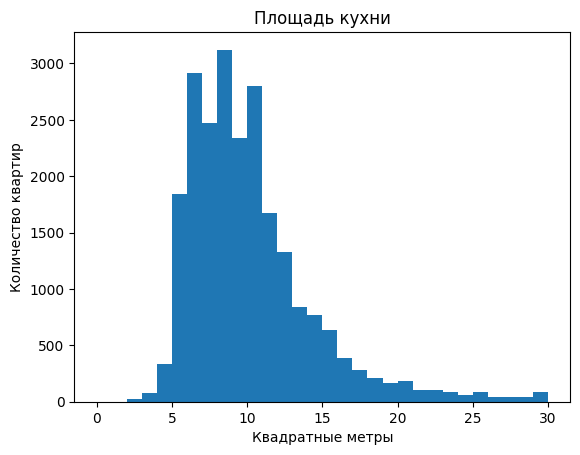

count    23371.000000
mean        10.384332
std          5.761793
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        107.000000
Name: kitchen_area, dtype: float64

Наибольшие по площади кухни варианты:
20215    107.000000
2489     100.700000
16239     93.200000
16797     93.000000
15016     87.537299
10867     87.200000
9826      86.504359
492       77.000000
4394      77.000000
14644     75.000000
Name: kitchen_area, dtype: float64


In [32]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(data['kitchen_area'].describe())
print()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Исследуем жилую площадь.

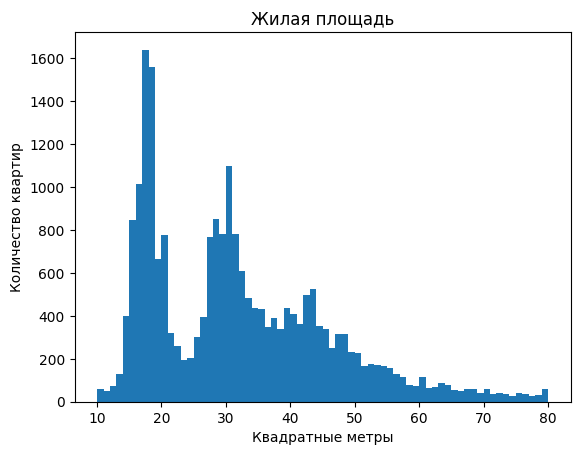

count    23371.000000
mean        33.619735
std         18.906458
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

Наибольшие по жилой площади варианты:
8018     301.500000
15016    285.586942
9826     282.217016
22494    274.000000
1085     255.700000
3676     252.447433
793      250.000000
15701    250.000000
6221     248.700000
22131    241.149614
Name: living_area, dtype: float64


In [33]:
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(data['living_area'].describe())
print()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

Исследуем стоимость квадратного метра.

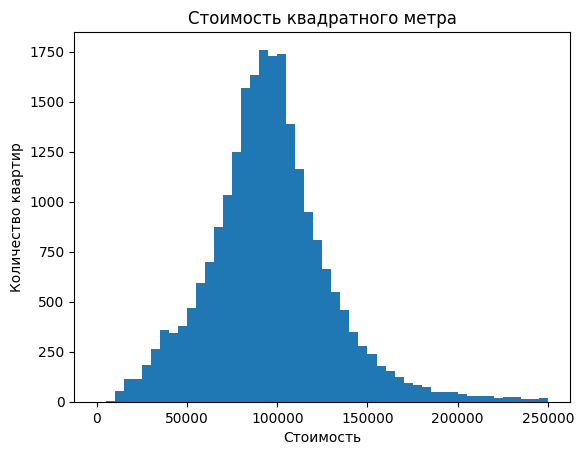

count    23371.000000
mean        33.619735
std         18.906458
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

Наибольшие по цене за квадрат варианты:
1436     1736842
22831    1542604
14706    1000748
4996      995983
17172     848484
4859      848484
16647     841379
17912     813253
8322      721518
6462      719298
Name: sm_price, dtype: int64


In [34]:
plt.hist(data['sm_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print(data['living_area'].describe())
print()
print('Наибольшие по цене за квадрат варианты:')
print(data['sm_price'].sort_values(ascending=False).head(10))

**Вывод**

**Площадь**

Имеются аномально большие значения более 200 квадратных метров. Большинство квартир имеют площадь менее 100 квадратных метров. 

**Стоимость**

Основная стоимость квартир 3-5 миллионов. Немного вариантов с ценой выше 20 миллионов. Имеются аномальные значения.

**Комнаты**

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат, выглядят странно.

**Высота потолков**

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Высота потолков более 4 метров выглядит подозрительно. Есть значения в 27 метров (это может быть ошибкой данных и реальная высота 2,7 метра).

**Площадь кухни**

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

**Жилая площадь**

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

**Стоимость квадратного метра**

Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.

Изучим время продажи квартиры

Время продажи (медиана): 95 

Время продажи (среднее): 180 



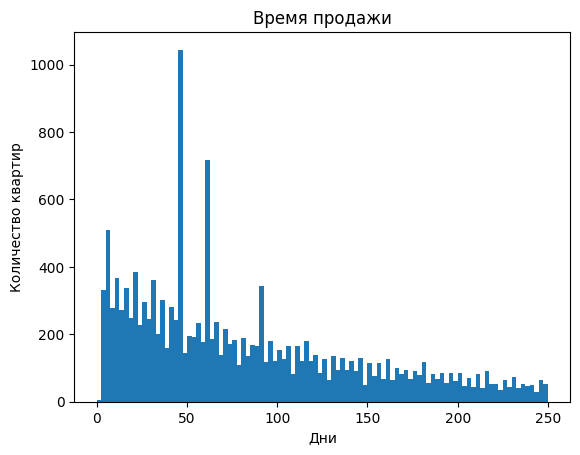

count    20257.000000
mean       180.107370
std        219.188834
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [35]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')
# Строим гистограмму времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

**Вывод**

Медианное время продажи - 95 дней. Среднее время продажи - 180 дней.
Большая часть квартир продаётся в срок до 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. Такие сделки могут указывать на признаки мошенничества. Также присутствуеют аномальные варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

Обработаем аномалии.

Определим факторы, влияющие на стоимость квартиры.

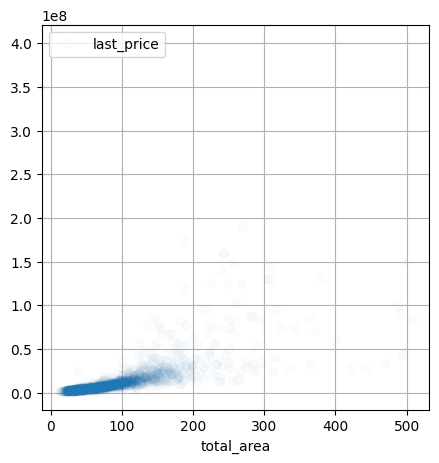

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.875653
total_area    0.875653    1.000000 



In [36]:
# Зависимость цены от площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.02)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

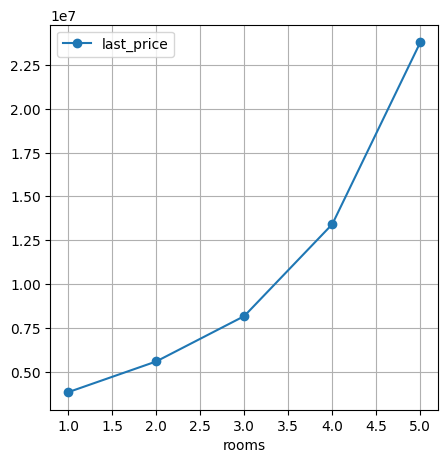

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.614457
rooms         0.614457  1.000000 



In [37]:
# Зависимость цены от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

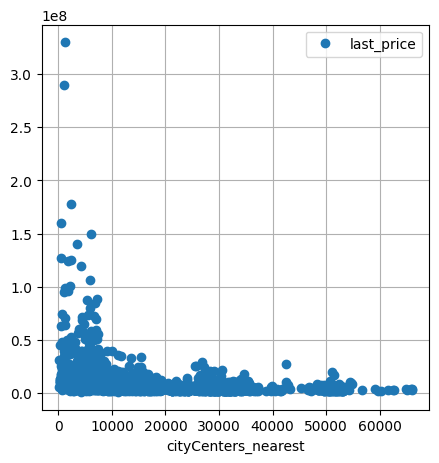

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.399695
last_price                      0.399695    1.000000 



In [38]:
# Зависимость цены от удалённости от центра
data.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

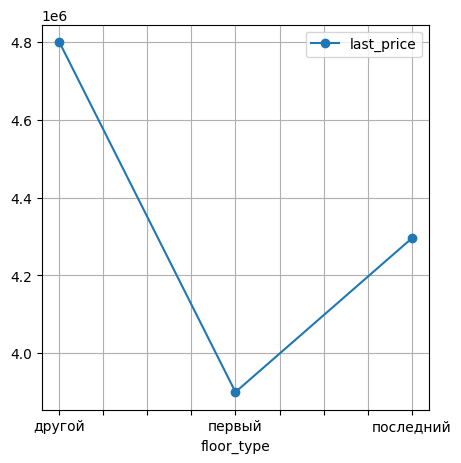

In [39]:
# Зависимость цены от этажа
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

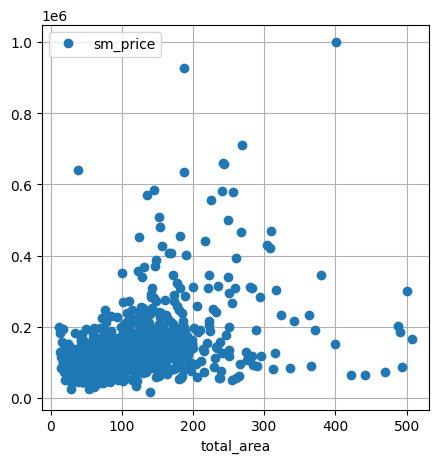

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price    1.000000    0.051991
total_area  0.051991    1.000000 



In [40]:
# Зависимость цены за квадрат от площади
data.pivot_table(index='total_area', values='sm_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

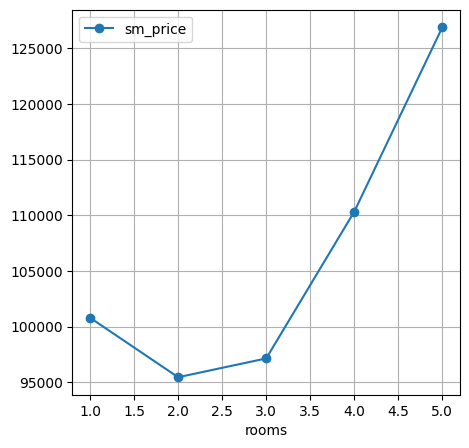

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000 -0.263158
sm_price -0.263158  1.000000 



In [41]:
# Зависимость цены за квадрат от числа комнат
data.query('rooms > 0').pivot_table(index='rooms', values='sm_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

**Вывод**

Чем больше *общая площадь* квартиры, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие квартиры находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Самые дешёвые квартиры находятся на первом этаже. Чуть дороже на последнем. Наибольшая стоимость у квартир, расположенных между первым и последним этажом.

Самые высокие цены за квадратный метр у однокомнатных квартир и квартир с 4 и 5 комнатами. 

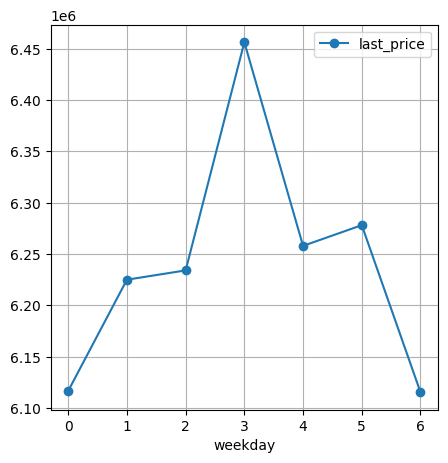

In [42]:
# Зависимость от дня размещения
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

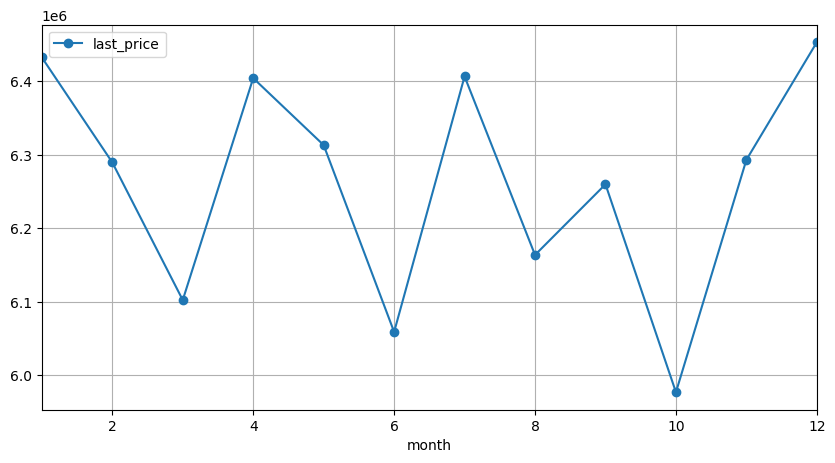

In [43]:
# Зависимость от месяца размещения
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()

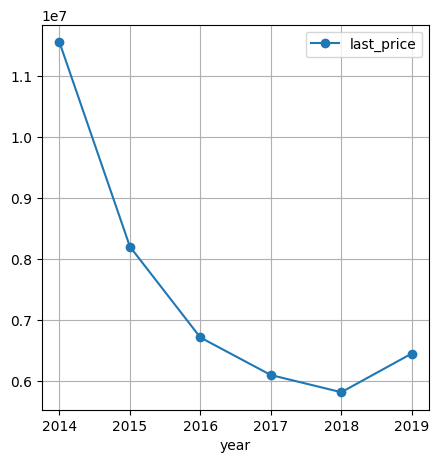

In [44]:
# Зависимость от года размещения
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

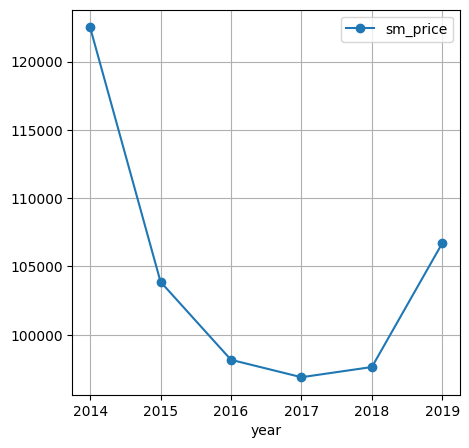

In [45]:
# Зависимость цены за квадратный метр от года размещения
data.pivot_table(index='year', values='sm_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

**Вывод**

Дороже всего квартиры, объявление о продаже которых опубликовано в среду, дешевле всего - в понедельник и воскресенье.

Дороже всего квартиры, продающиеся с декабря, дешевле всего - с октября.

С 2014 по 2017 годы резко упала стоимость квадратного метра жилья. Следовательно, квартиры тоже очень сильно подешевели в этих годах. Вероятно, это вызвано некоторым кризисом 2014-2015 годов. В 2017 году цены снова начали расти.

Сравним среднюю стоимость за квадратный метр в топ-10 городах

In [46]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114423
Пушкин,103220
Кудрово,95260
Парголово,90331
Мурино,86040
Шушары,78550
Колпино,75332
Гатчина,68745
Всеволожск,68654


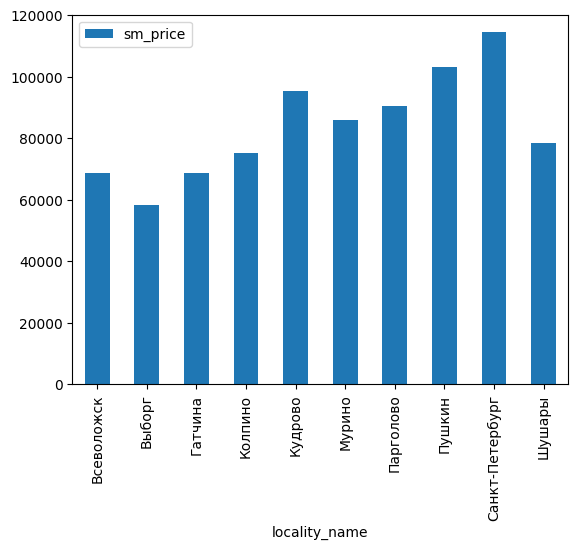

In [47]:
city_sm_price.plot(kind='bar')
None

**Вывод**

Было изначально понятно, что наибольшая средняя стоимость за квадратный метр будет в Санкт-Петербурге. Эта гипотеза подтвердилась. Высокая стоимость в Пушкине может быть обусловлена экологичностью и новизной жилого фонда. Очевидно, что в примыкающих к Санкт-Петербургу населённых пунктах стоимость уменьшается. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, находящихся далеко от Санкт-Петербурга. Замыкает топ-10 Выборг с небольшим количеством населения и расположенный далеко от Санкт-Петербурга.

Определим границу центральной зоны для Санкт-Петербурга

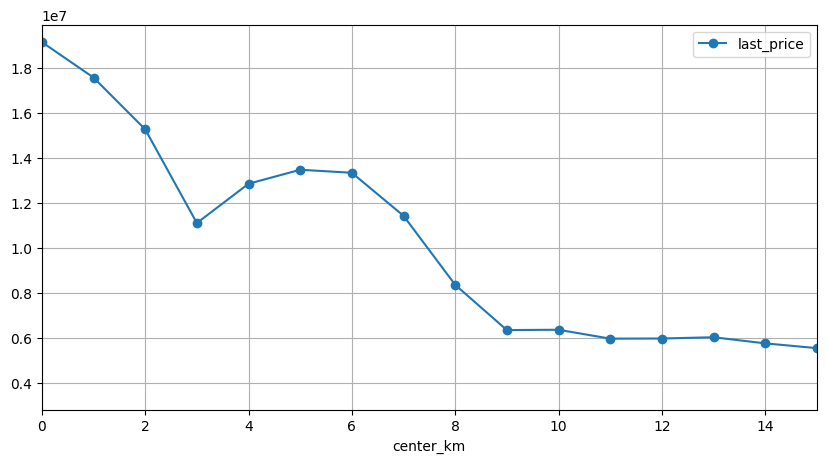

In [48]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Супер, корректно выделены квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислена средняя цена каждого километра.

</div>

**Вывод**

Центральная зона Санкт-Петербурга находится в пределах 7 км. Далее средняя цена на квартиры резко снижается.

Анализ сегмента в центрально зоне

Площадь (медиана): 55 

Площадь в центре (медиана): 75 

Площадь (среднее): 63 

Площадь в центре (среднее): 86 



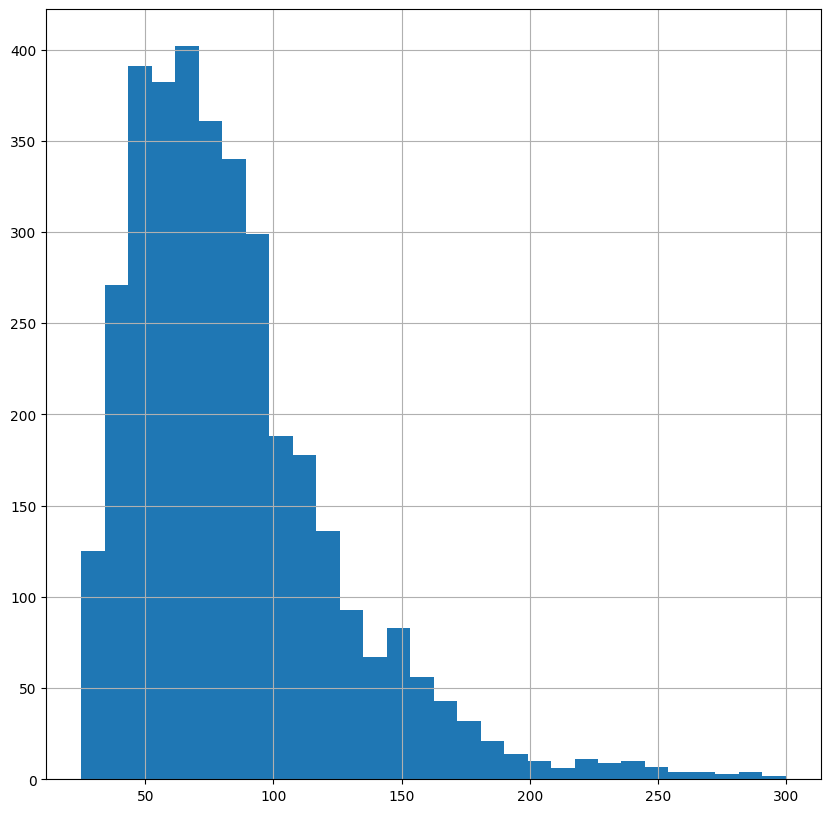

In [49]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)')

# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

Число вариантов с ценой больше 20 млн: 466


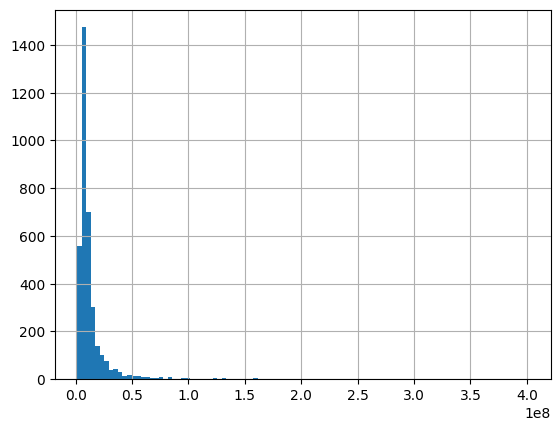

In [50]:
# Изучаем стоимость
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

In [51]:
# Изучаем число комнат
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4912,31.985414,579,16.164154,12.0
2,5082,33.092401,1119,31.239531,22.0
3,4107,26.743505,1161,32.412060,28.0
4,966,6.290291,503,14.042434,52.0
5,290,1.888390,220,6.141820,76.0


In [52]:
# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

Высота потолков (медиана): 2.7 

Высота потолков в центре (медиана): 3.0 

Высота потолков (среднее): 2.765004849346955 

Высота потолков в центре (среднее): 2.984783333333333 



**Вывод**

Площадь квартир в центре в среднем на 13-14 метров больше, чем в целом по городу. Также в центре находится большое число квартир с площадью 100 квадратных метров и более.

В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.

Высота потолков в центре выше в среднем на 12 сантиметров.

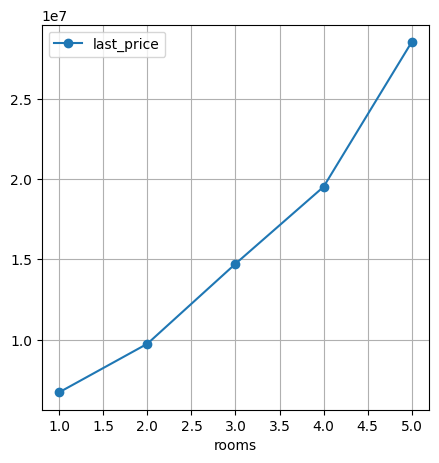

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.656761
rooms         0.656761  1.000000 



In [53]:
# Зависимость цены от числа комнат
spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

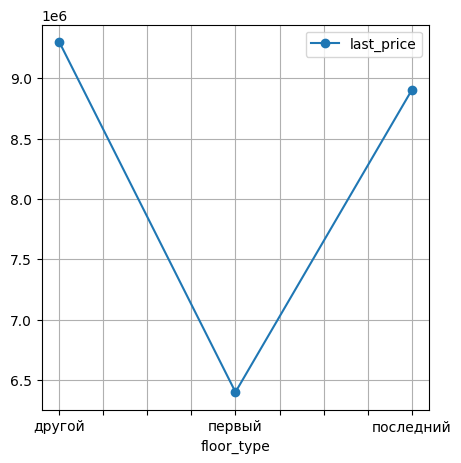

In [54]:
# Зависимость цены от этажа
spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

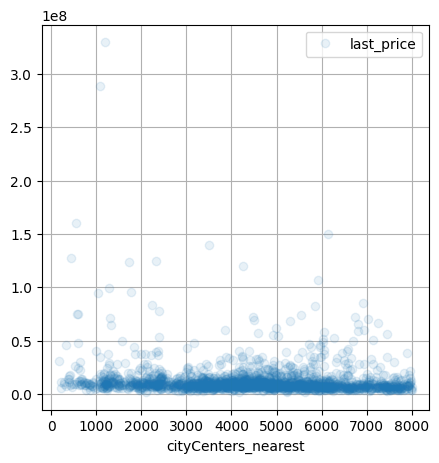

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.077261
last_price                      0.077261    1.000000 



In [55]:
# Зависимость цены от удалённости от центра
spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha=0.1)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

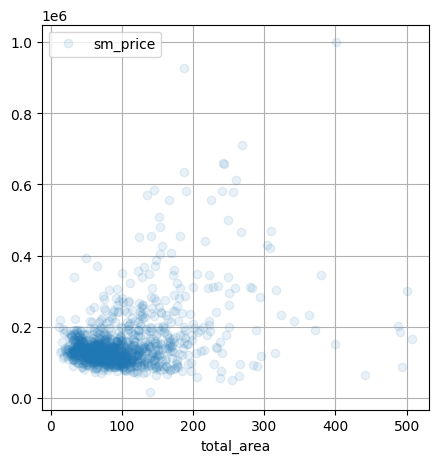

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price    1.000000    0.177967
total_area  0.177967    1.000000 



In [56]:
# Зависимость цены за квадрат от площади
spb_center.pivot_table(index='total_area', values='sm_price').plot(grid=True, style='o', figsize=(5, 5), alpha=0.1)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

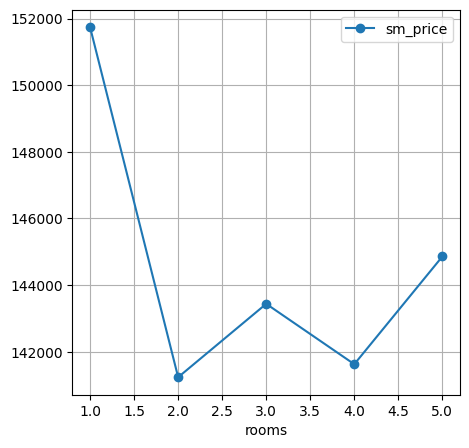

Корреляция цены за квадрат и числа комнат: 

             rooms  sm_price
rooms     1.000000 -0.046032
sm_price -0.046032  1.000000 



In [57]:
# Зависимость цены за квадрат от числа комнат
spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

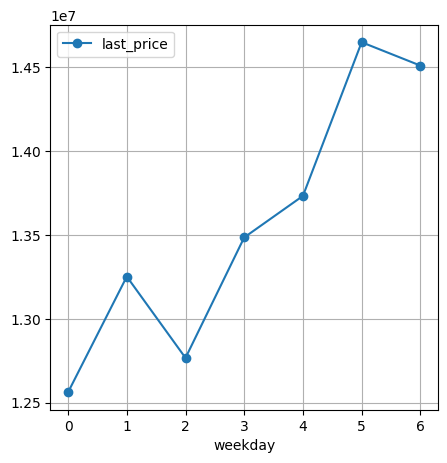

In [58]:
# Зависимость от дня размещения
spb_center.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

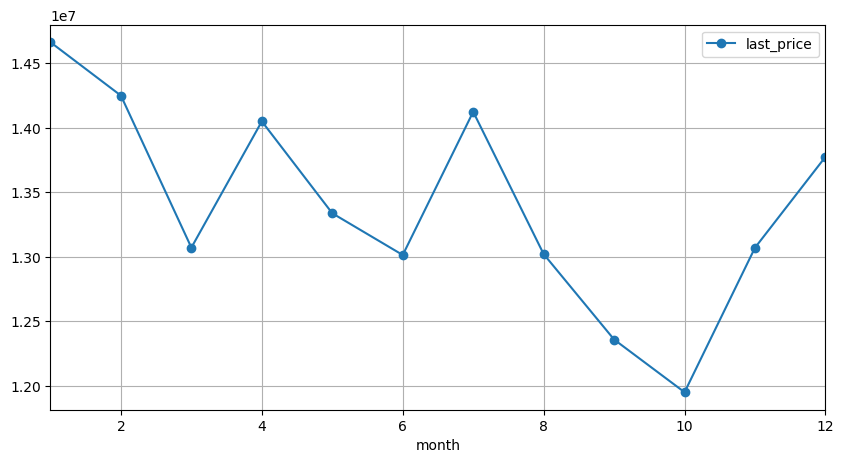

In [59]:
# Зависимость от месяца размещения
spb_center.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()

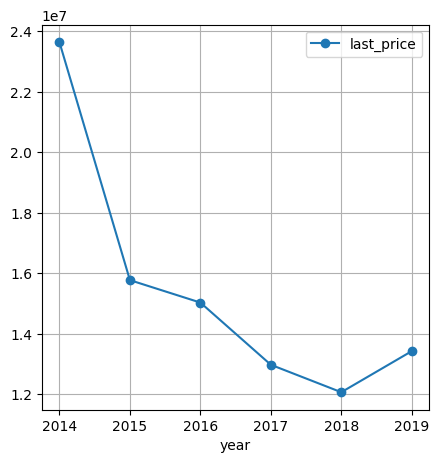

In [60]:
# Зависимость от года размещения
spb_center.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Красивые графики, сравнение верное, выводы соответствуют графикам.

</div>

**Вывод**<br/>
* Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу.
* В центре самые дешёвые только квартиры первого этажа, последний и промежуточные стоят примерно одинаково.
* В центре есть очень дорогие однокомнатные квартиры.
* В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
* В центре значительно выше стоимость квартир, опубликованных в субботу и в январе.
* Стоимость квартир в центре значительно упала в 2014-2017 годах и начала расти в 2018 году. 

### Общий вывод

**Срок продажи квартиры**

В большинстве вариантов квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

**Факторы, влияющие на стоимость**

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.<br/>
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

**Стоимость квадратного метра в топ-10 населённых пунктов**

Дороже всего квадратный метр в Санкт-Петербурге - 114848<br/>
Дешевле всего квадратный метр в Выборге - 58141

**Факторы, влияющие на стоимость в центре Санкт-Петербурга**

В центре города практически нет разницы, насколько квартира удалена от условного центра города.<br/>
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.<br/>
В центре есть очень дорогие однокомнатные квартиры<br/>

# Общий вывод #

**Предобработка данных** 

В исходных практически в половине столбцов имелись пропуски, которые были адекватно устранены. В работе обработаны неявные дубликаты названий населённых пунктов. Был преобразован тип данных в строках. Определены и устранены выбросы, их количество менее 10%.

**Цели работы**

Цели работы достигнуты. 

Анализ показал, что самые дорогие квартиры находятся в центре Санкт-Петербурга. В среднем стоимость квартир составляет 4-5 млн. рублей. Чем дальше от центра, тем стоимость квартир уменьшается. Самые дешёвые квартиры находятся на первом этаже. Чуть дороже на последнем. Наибольшая стоимость у квартир, расположенных между первым и последним этажом.

Самые высокие цены за квадратный метр у однокомнатных квартир и квартир с 4 и 5 комнатами. 

Определена средняя стоимость за квадратный метр жилья в топ-10 населённых пунктах. Наибольшая - в Санкт-Петербурге (114423 руб/кв.метр) и Пушкине (103220 руб/кв.метр), наименьшая - в Выборге (58141 руб/кв.метр).

В ходе работы была исследована динамика цен. С 2014 по 2017 годы квартиры сильно дешевели из-за экономической ситуации в стране (возможно, на фоне санкций), с 2018 года заметен явный рост в стоимости жилья.

